In [62]:
import os
import pysal as ps 
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal.lib
import pysal.explore
import pysal.viz
import pysal.model

In [87]:
os.chdir('C:/Users/jwolf/Documents/MEGA/03_Doutoramento/06_Base de dados/School closure')

In [88]:
path = "C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Administrativos/Municípios/Cont_AAD_CAOP2018/\
Cont_AAD_CAOP2018.shp"
gdf_freguesias_CAOP2018 = gpd.read_file (path)
gdf_freguesias_CAOP2018['code_mun'] = gdf_freguesias_CAOP2018['Dicofre'].str.slice(0,4)

In [89]:
df_correspond_nuts3 = pd.read_csv("CODIGOS_MUNICIPIOS_NUTS3.csv",engine='python', header = 0,\
                                  sep = ";",dtype= {'Cod_mun': str}, decimal=",")
df_correspond_nuts3.dropna(inplace = True)

In [90]:
# pd.merge(gdf_freguesias_CAOP2018, df_correspond_nuts3, how = left,  left_on = "code_mun")
gdf_freguesias_CAOP2018= pd.merge(gdf_freguesias_CAOP2018, df_correspond_nuts3, how='left', left_on = "code_mun",right_on= "Cod_mun")

In [78]:
#gdf_freguesias_CAOP2018.to_file("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Administrativos/", driver = 'GeoJSON')

In [91]:
gdf_freguesias_CAOP2018.head(3)

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry,code_mun,Cod_mun,NUTS3_2016,NUTS_nome
0,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.04,3436.91,Sagres,POLYGON ((-69674.53039999958 -294276.293899999...,0815,0815,150,Algarve
1,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.17,3436.91,Sagres,"POLYGON ((-69645.82100000046 -294240.6941, -69...",0815,0815,150,Algarve
2,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.20,3436.91,Sagres,"POLYGON ((-69720.37119999994 -294162.9945, -69...",0815,0815,150,Algarve


In [92]:
# gdf_freguesias_CAOP2018.plot(figsize = [10,10])
gdf_freguesias_CAOP2018.drop(['Cod_mun'], axis=1, inplace = True)

In [93]:
#3763 código epsg etrs89 e Portugal TM06
#WGS84 = epsg 4326

gdf_freguesias_CAOP2018 = gdf_freguesias_CAOP2018.to_crs(epsg=3763)

In [94]:
gdf_municipios_CAOP2018 = gdf_freguesias_CAOP2018.dissolve(by='code_mun')
gdf_municipios_CAOP2018.drop(['Dicofre','Freguesia', 'Des_Simpli', 'TAA'], axis = 1, inplace = True)

In [96]:
df_schools = pd.read_csv("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Muhamad/Schools.csv",\
                         engine='python', header = 0, sep = ";",dtype= {'Code': str}, decimal=",")
gdf_municipios_CAOP2018 = pd.merge(gdf_municipios_CAOP2018, df_schools, how='left', left_on=['code_mun'],\
                                   right_on = ['Code'])

In [97]:
gdf_municipios_CAOP2018.head(2)

,geometry,Concelho,Distrito,AREA_EA_Ha,AREA_T_Ha,NUTS3_2016,NUTS_nome,Code,Name,1999 / 2000,...,2008 / 2009,2009 / 2010,2010 / 2011,2011 / 2012,2012 / 2013,2013 / 2014,2014 / 2015,2015 / 2016,2016 / 2017,TX_99_17
0,POLYGON ((-14839.47989999963 103073.8716999997...,ÁGUEDA,AVEIRO,1019.01,1019.01,16D,Região de Aveiro,0101,Águeda,46,...,28,27,27,27,27,26,22,16,13,-71.7
1,POLYGON ((-29041.31800000001 108973.6844999988...,ALBERGARIA-A-VELHA,AVEIRO,1535.86,1535.86,16D,Região de Aveiro,0102,Albergaria-a-Velha,33,...,21,21,21,19,14,14,14,14,14,-57.6


In [98]:
df_TFR = pd.read_csv("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Muhamad/ISF_2017_pivot.csv",\
                         engine='python', header = 0, sep = ";",dtype= {'Code': str}, decimal=",")
gdf_municipios_CAOP2018 = pd.merge(gdf_municipios_CAOP2018, df_TFR, how='left', left_on=['Code'],\
                                   right_on = ['code'])

In [99]:
gdf_municipios_CAOP2018.head(2)

,geometry,Concelho,Distrito,AREA_EA_Ha,AREA_T_Ha,NUTS3_2016,NUTS_nome,Code,Name,1999 / 2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,POLYGON ((-14839.47989999963 103073.8716999997...,ÁGUEDA,AVEIRO,1019.01,1019.01,16D,Região de Aveiro,0101,Águeda,46,...,1.306786,1.044470,1.328006,1.205747,1.296856,1.136898,1.140649,1.198217,1.291992,1.343995
1,POLYGON ((-29041.31800000001 108973.6844999988...,ALBERGARIA-A-VELHA,AVEIRO,1535.86,1535.86,16D,Região de Aveiro,0102,Albergaria-a-Velha,33,...,1.466102,1.223666,1.436348,1.320706,1.346505,1.106821,1.315762,1.198808,1.128989,1.330246


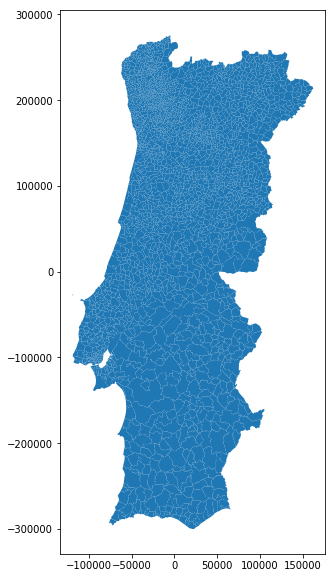

In [82]:
gdf_freguesias_CAOP2018.plot(figsize = (10,10))

In [100]:
# w3= pysal.lib.weights.KNN.from_shapefile(path, k= 3)
matriz_dist_3_vizinhos= pysal.lib.weights.KNN.from_dataframe(gdf_municipios_CAOP2018, k= 3)

In [101]:
w_distancia = pysal.lib.weights.DistanceBand.from_dataframe(gdf_municipios_CAOP2018, p = 2, alpha=-2, threshold= 30000)

C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\pysal\lib\weights\util.py:805: UserWarning: There is one disconnected observation (no neighbors).
Island id: 63
  silence_warnings=silence_warnings)
C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\pysal\lib\weights\distance.py:791: UserWarning: There is one disconnected observation (no neighbors).
Island id: 63
  W.__init__(self, neighbors, weights, ids, silence_warnings=self.silence_warnings)


In [102]:
y = gdf_municipios_CAOP2018['TX_99_17']
y2= gdf_municipios_CAOP2018['2017']
moran_3 = pysal.explore.esda.Moran_Local(y, matriz_dist_3_vizinhos, transformation='r', permutations=999)
moran_dist = pysal.explore.esda.Moran_Local(y, w_distancia, transformation='r', permutations=999)
moran_3_TFR = pysal.explore.esda.Moran_Local(y2, matriz_dist_3_vizinhos, transformation='r', permutations=999)
moran_dist_TFR = pysal.explore.esda.Moran_Local(y2, w_distancia, transformation='r', permutations=999)

('WARNING: ', 63, ' is an island (no neighbors)')


C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\pysal\explore\esda\moran.py:895: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [103]:
moran_I = pysal.explore.esda.Moran(y2, w_distancia, transformation='r', permutations=999)


print("p value =", moran_I.p_norm, "Moran I = ", moran_I.I,"expected value under normality assumption", moran_I.EI) 

p value = 0.0 Moran I =  0.33821074592670564 expected value under normality assumption -0.0036101083032490976


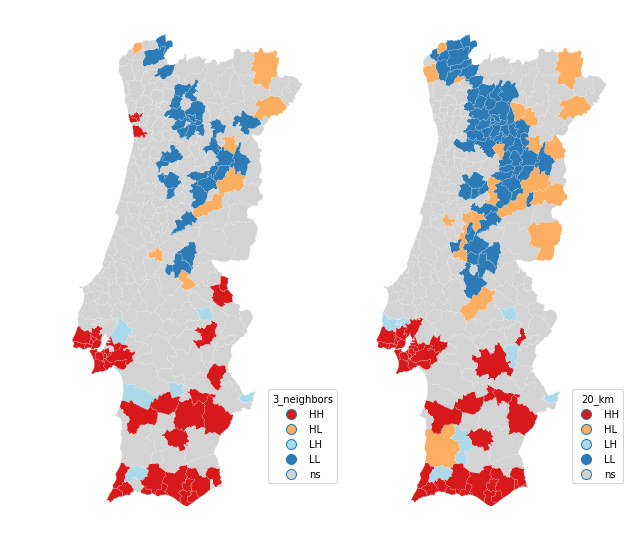

In [104]:
from pysal.viz.splot.esda import lisa_cluster
gdf_municipios_CAOP2018_2 = gdf_municipios_CAOP2018.copy()

# fig, ax = plt.subplots()
# ax.plot(x, y)
# ax.set_title('Simple plot')

fig, axs = plt.subplots(1,2,figsize = (10,10))
cartogramas = [(moran_3_TFR, '3_neighbors'), (moran_dist_TFR, '20_km')]
i=0 
for x in cartogramas:
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28), 'title': x[1]}
    lisa_cluster(x[0], gdf_municipios_CAOP2018_2, p=0.1, ax = axs [i], legend_kwds= legenda)
    i += 1


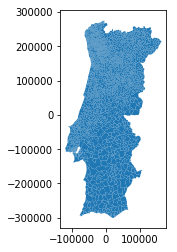

In [72]:
gdf_municipios_CAOP2018.plot()

In [ ]:
w3= pysal.lib.weights.KNN.from_shapefile(path, k= 3)

In [65]:
gdf_municipios_CAOP2018.columns

Index(['Dicofre', 'Freguesia', 'Concelho', 'Distrito', 'TAA', 'AREA_EA_Ha',
       'AREA_T_Ha', 'Des_Simpli', 'geometry', 'code_mun', 'Code', 'Name',
       '1999 / 2000', '2000 / 2001', '2001 / 2002', '2005 / 2006',
       '2006 / 2007', '2007 / 2008', '2008 / 2009', '2009 / 2010',
       '2010 / 2011', '2011 / 2012', '2012 / 2013', '2013 / 2014',
       '2014 / 2015', '2015 / 2016', '2016 / 2017', 'TX_99_17'],
      dtype='object')

In [54]:
gdf_municipios_CAOP2018

,geometry,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha
code_mun,,,,,,
0101,"POLYGON ((-14839.47989999969 103073.8717, -147...",ÁGUEDA,AVEIRO,ÁREA PRINCIPAL,1019.01,1019.01
0102,POLYGON ((-29041.31799999997 108973.6844999995...,ALBERGARIA-A-VELHA,AVEIRO,ÁREA PRINCIPAL,1535.86,1535.86
0103,POLYGON ((-17937.65429999959 84025.50610000081...,ANADIA,AVEIRO,ÁREA PRINCIPAL,1690.42,1690.42
0104,POLYGON ((-3034.488499999978 132934.3535999991...,AROUCA,AVEIRO,ÁREA PRINCIPAL,3123.16,3123.16
0105,POLYGON ((-33572.63009999972 101373.2245000005...,AVEIRO,AVEIRO,ÁREA PRINCIPAL,3231.95,3231.95
0106,POLYGON ((-8751.031399999745 148572.9556000009...,CASTELO DE PAIVA,AVEIRO,ÁREA PRINCIPAL,3310.65,3310.65
0107,POLYGON ((-40260.97910000011 145943.5590000004...,ESPINHO,AVEIRO,ÁREA PRINCIPAL,545.48,545.48
0108,POLYGON ((-31970.07110000029 116517.7459999993...,ESTARREJA,AVEIRO,ÁREA PRINCIPAL,2302.19,2302.19
0109,POLYGON ((-31936.94660000037 136051.6052000001...,SANTA MARIA DA FEIRA,AVEIRO,ÁREA PRINCIPAL,1988.24,2358.22


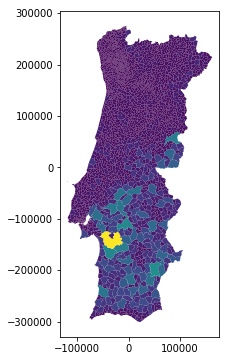

In [26]:
fig, ax = plt.subplots(1, figsize=(10, 6))
# ax.axis('off')
gdf_freguesias_CAOP2018.plot(ax = ax,column='AREA_T_Ha')
# gdf_freguesias_CAOP2018.plot(ax = ax , linewidth=0, column = 0)